<a href="https://colab.research.google.com/github/RaisaAnika/loan_nbfc_hacathon/blob/main/LOAN_NBFC_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HACATHON TOPIC: **NBFC Loan Default**
Team Details: 
**Data_Falcon**
 Members:
  * Anika Raisa Chowdhury
  * Ian Brick
  * Fabrizio Maltese

Hackathon link: https://olympus.greatlearning.in/hackathons/216 
Repository link: https://github.com/RaisaAnika/loan_nbfc_hacathon 

A non-banking financial institution (NBFI) or non-bank financial company (NBFC) is a Financial Institution that does not have a full banking license or is not supervised by a national or international banking regulatory agency. NBFC facilitates bank-related financial services, such as investment, risk pooling, contractual savings, and market brokering.

The following is the story of a challenge faced by DHDL Ltd. (Name Changed), an NBFC in India. In recent times, the company is struggling to mark profits due to an increase in Loan Defaults. The company aims to determine the relative importance of each parameter with regards to their contribution as to whether a loan is going to default or not. Provided is a sample that contains the data of 90,000 + clients who have taken a loan from the company in the past with the information on whether the loan defaulted. 

The objective of this exercise is to understand which parameters play an important role in determining whether a client will default on the loan payment or not. 

**Goal:**
The goal of the problem is to predict whether a client will default on the loan payment or not. For each ID in the test_data, you must predict the “default” level.


**Datasets**
The problem contains two datasets, Train Data, and Test Data. Model building is to be done on Train Dataset and the Model testing is to be done on Test Dataset. The output from the Test Data is to be submitted in the Hackathon platform


**Metric to measure**
Your score is the percentage of all correct predictions made by you. This is simply known as accuracy. The best accuracy is 1 whereas the worst is 0. It will be calculated as the total number of two correct predictions (True positive + True negative) divided by the total number of observations in the dataset.


**Submission File Format:**
You should submit a CSV file with exactly 39933 entries plus a header row.
The file should have exactly two columns

·         ID ( sorted in any order)

·         default (contains 0 & 1, 1 represents default)

In [ ]:
##Library Imports

import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import Pool, cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier

from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from keras.wrappers.scikit_learn import KerasClassifier
import keras.layers 
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder as ohc

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import warnings

In [8]:
df_dict = pd.read_csv("/content/Data_Dictionary_(1).csv")
df_dict

,ID,unique ID assigned to each applicant
0,loan_amnt,loan amount ($) applied each applicant
1,loan_term,Loan duration in years
2,interest_rate,Applicable interest rate on Loan in %
3,loan_grade,Loan Grade Assigned by the bank
4,loan_subgrade,Loan SubGrade Assigned by the bank
5,job_experience,Number of years job experience
6,home_ownership,Status of House Ownership
7,annual_income,Annual income of the applicant
8,income_verification_status,Status of Income verification by the bank
9,loan_purpose,Purpose of loan


In [ ]:
!pip install catboost

In [9]:
df_test = pd.read_csv("/content/Test_set.csv")
df_test.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,debt_consolidation,CA,14.62,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.0,128098.0,25800.0
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.0,Not Verified,credit_card,VA,11.38,0.0,0.0,7592,14.0,202.68,INDIVIDUAL,13.0,269396.0,23600.0
2,3637416,15000,3 years,14.33,C,C1,6-10 years,MORTGAGE,50000.0,Verified,debt_consolidation,TX,28.15,0.0,1.0,17983,19.0,1166.24,INDIVIDUAL,30.0,220135.0,34100.0
3,53682249,12000,3 years,9.99,B,B3,6-10 years,RENT,37000.0,Source Verified,credit_card,NJ,34.32,0.0,0.0,12262,18.0,635.06,INDIVIDUAL,35.0,39436.0,21700.0
4,53937165,20150,3 years,11.53,B,B5,<5 Years,RENT,75000.0,Source Verified,debt_consolidation,CA,26.74,1.0,0.0,8251,11.0,1232.84,INDIVIDUAL,31.0,52764.0,12000.0


In [10]:
df_train = pd.read_csv("/content/Train_set.csv")
df_train.head()

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,72199369,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,debt_consolidation,NC,26.68,0.0,0.0,39519,20.0,59.60,INDIVIDUAL,4.0,95493.0,84100.0,0
1,14257956,18000,3 years,13.65,C,C1,<5 Years,OWN,64000.0,Verified,debt_consolidation,SC,31.67,0.0,1.0,9783,24.0,3348.25,INDIVIDUAL,95.0,185433.0,13500.0,0
2,66216451,16000,3 years,7.26,A,A4,<5 Years,MORTGAGE,150000.0,Source Verified,debt_consolidation,TX,19.70,2.0,0.0,13641,27.0,276.69,INDIVIDUAL,13.0,180519.0,19300.0,0
3,46974169,25000,3 years,13.99,C,C4,NaN,MORTGAGE,59800.0,Verified,debt_consolidation,MO,37.39,0.0,0.0,35020,35.0,1106.72,INDIVIDUAL,17.0,183208.0,55400.0,0
4,46725961,17000,3 years,6.39,A,A2,10+ years,MORTGAGE,72000.0,Source Verified,credit_card,TX,8.92,0.0,0.0,23990,26.0,725.29,INDIVIDUAL,39.0,23990.0,81300.0,0


# **EDA and Data Cleaning**

In [11]:
df_test.shape

(39933, 22)

In [12]:
df_train.shape

(93174, 23)

In [14]:

df_train.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    1
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      2
public_records                   2
revolving_balance                0
total_acc                        2
interest_receive                 0
application_type                 0
last_week_pay                 1924
total_current_balance         7386
total_revolving_limit         7386
default                          0
dtype: int64

Denotes missing values in the dataset in few of the columns including job experience, last_week_pay, total_current_balance, total_revolving_limit.


In [16]:
df_train.nunique()

ID                            93174
loan_amnt                      1310
loan_term                         2
interest_rate                   481
loan_grade                        7
loan_subgrade                    35
job_experience                    3
home_ownership                    5
annual_income                  8667
income_verification_status        3
loan_purpose                      4
state_code                       50
debt_to_income                 3996
delinq_2yrs                      22
public_records                   15
revolving_balance             35945
total_acc                       102
interest_receive              69122
application_type                  2
last_week_pay                    90
total_current_balance         72306
total_revolving_limit          4469
default                           2
dtype: int64

In [17]:
def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot
plt.figure(figsize=(10, 5))


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

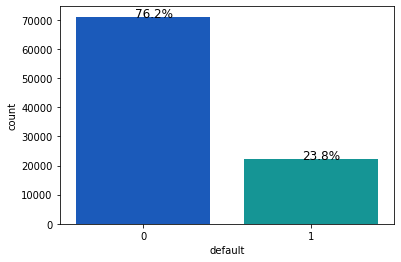

In [18]:
ax = sns.countplot(df_train["default"], palette="winter")
perc_on_bar(ax, df_train["default"])

23.8% of the customerss defaulted their loan.

In [24]:
df_train.describe()

,ID,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,default
count,9.317400e+04,93174.000000,93174.000000,9.317300e+04,93174.000000,93172.000000,93172.000000,9.317400e+04,93172.000000,93174.000000,91250.000000,8.578800e+04,8.578800e+04,93174.000000
mean,3.505021e+07,14733.861378,13.233433,7.502826e+04,18.127623,0.316994,0.196121,1.685447e+04,25.248905,1747.263530,58.154882,1.392529e+05,3.208590e+04,0.237502
std,2.414926e+07,8428.184858,4.368728,6.945478e+04,8.563084,0.880859,0.581188,2.368907e+04,11.855061,2088.236141,44.326560,1.576868e+05,4.705251e+04,0.425555
min,7.073500e+04,500.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.085983e+07,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,6.433000e+03,17.000000,439.880000,22.000000,2.964200e+04,1.400000e+04,0.000000
50%,3.710751e+07,13000.000000,12.990000,6.400000e+04,17.640000,0.000000,0.000000,1.185600e+04,24.000000,1070.755000,48.000000,7.936350e+04,2.370000e+04,0.000000
75%,5.859895e+07,20000.000000,16.200000,9.000000e+04,23.890000,0.000000,0.000000,2.074500e+04,32.000000,2219.612500,83.000000,2.071600e+05,3.970000e+04,0.000000
max,7.351975e+07,35000.000000,28.990000,9.500000e+06,672.520000,22.000000,49.000000,2.560703e+06,119.000000,23172.310000,291.000000,8.000078e+06,9.999999e+06,1.000000


In [42]:
# General statistics
def stats(x):
    print(f"Variable: {x}")
    print(f"Type of variable: {data[x].dtype}")
    print(f"Total observations: {data[x].shape[0]}")
    detect_null_val = data[x].isnull().values.any()
    if detect_null_val:
        print(f"Missing values: {data[x].isnull().sum()} ({(data[x].isnull().sum() / data[x].isnull().shape[0] *100).round(2)}%)")
    else:
        print(f"Missing values? {data[x].isnull().values.any()}")
    print(f"Unique values: {data[x].nunique()}")
    if data[x].dtype != "O":
        print(f"Min: {int(data[x].min())}")
        print(f"25%: {int(data[x].quantile(q=[.25]).iloc[-1])}")
        print(f"Median: {int(data[x].median())}")
        print(f"75%: {int(data[x].quantile(q=[.75]).iloc[-1])}")
        print(f"Max: {int(data[x].max())}")
        print(f"Mean: {data[x].mean()}")
        print(f"Std dev: {data[x].std()}")
        print(f"Variance: {data[x].var()}")
        print(f"Skewness: {scipy.stats.skew(data[x])}")
        print(f"Kurtosis: {scipy.stats.kurtosis(data[x])}")
        print("")
        
        # Percentiles 1%, 5%, 95% and 99%
        print("Percentiles 1%, 5%, 95%, 99%")
        display(data[x].quantile(q=[.01, .05, .95, .99]))
        print("")
    else:
        print(f"List of unique values: {data[x].unique()}")

# Variable vs. target chart
def target(x):
    short_0 = data[data.bad_loan == 0].loc[:,x]
    short_1 = data[data.bad_loan == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Not-default', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

In [44]:
# Boxplot + Hist chart

def boxhist(x):
    variable = data[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.title(x, fontsize=10, loc="right")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()

# Histogram
def hist(x):
    plt.hist(data[x], bins=25)
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

# Pie chart
def pie(x):
    data[x].value_counts(dropna=False).plot(kind='pie', figsize=(6,5), fontsize=10, autopct='%1.1f%%', startangle=0, legend=True, textprops={'color':"white", 'weight':'bold'});
# Number of observations by class
    obs = data[x].value_counts(dropna=False)
    o = pd.DataFrame(obs)
    o.rename(columns={x:"Freq abs"}, inplace=True)
    o_pc = (data[x].value_counts(normalize=True) * 100).round(2)
    obs_pc = pd.DataFrame(o_pc)
    obs_pc.rename(columns={x:"percent %"}, inplace=True)
    obs = pd.concat([o,obs_pc], axis=1)
    display(obs)

In [46]:
# Variable vs. target chart
def target(x):
    short_0 = data[data.bad_loan == 0].loc[:,x]
    short_1 = data[data.bad_loan == 1].loc[:,x]
    
    a = np.array(short_0)
    b = np.array(short_1)
    
    np.warnings.filterwarnings('ignore')
    
    plt.hist(a, bins=40, density=True, color="g", alpha = 0.6, label='Not-default', align="left")
    plt.hist(b, bins=40, density=True, color="r", alpha = 0.6, label='Default', align="right")
    plt.legend(loc='upper right')
    plt.title(x, fontsize=10, loc="right")
    plt.xlabel('Relative frequency')
    plt.ylabel('Absolute frequency')
    plt.show()

# Boxplot + Hist chart

def boxhist(x):
    variable = data[x]
    np.array(variable).mean()
    np.median(variable)
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.5, 2)})
    mean=np.array(variable).mean()
    median=np.median(variable)
    sns.boxplot(variable, ax=ax_box)
    ax_box.axvline(mean, color='r', linestyle='--')
    ax_box.axvline(median, color='g', linestyle='-')
    sns.distplot(variable, ax=ax_hist)
    ax_hist.axvline(mean, color='r', linestyle='--')
    ax_hist.axvline(median, color='g', linestyle='-')
    plt.title(x, fontsize=10, loc="right")
    plt.legend({'Mean':mean,'Median':median})
    ax_box.set(xlabel='')
    plt.show()

# Bar chart
def bar(x):
    ax = data[x].value_counts().plot(kind="bar", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
    for p in ax.patches:
        ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    plt.xlabel(x, fontsize=10)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.ylabel("Absolute values", fontsize=10)
    plt.title(x, fontsize=10, loc="right")
    

    
# Barh chart
def barh(x):
    data[x].value_counts().plot(kind="barh", figsize=(6,5), fontsize=10, color=sns.color_palette("rocket"), table=False)
    plt.xlabel("Absolute values", fontsize=10)
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.ylabel(x, fontsize=10)
    plt.title(x, fontsize=10, loc="right")
# Pivot_table_mean
def pivot_mean(a, b, c):
    type_pivot_mean = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.mean)
    display(type_pivot_mean)
# Display pivot_table
    type_pivot_mean.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);
# Pivot_table_sum
def pivot_sum(a, b, c):
    type_pivot_sum = data.pivot_table(
        columns=a,
        index=b,
        values=c, aggfunc=np.sum)
    display(type_pivot_sum)
# Display pivot_table
    type_pivot_sum.sort_values(by=[b], ascending=True).plot(kind="bar", title=(b), figsize=(6,4),fontsize = 12);

    
# Scatter plot
def scatter(x, y):
  targets = data["bad_loan"].unique()
  for target in targets:
    a = data[data["bad_loan"] == target][x]
    b = data[data["bad_loan"] == target][y]
    plt.scatter(a, b, label=f"bad loan: {target}", marker="*")
    
    plt.xlabel(x, fontsize=10)
    plt.ylabel(y, fontsize=10)
    plt.title("abc", fontsize=10, loc="right")
    plt.legend()
    plt.show()

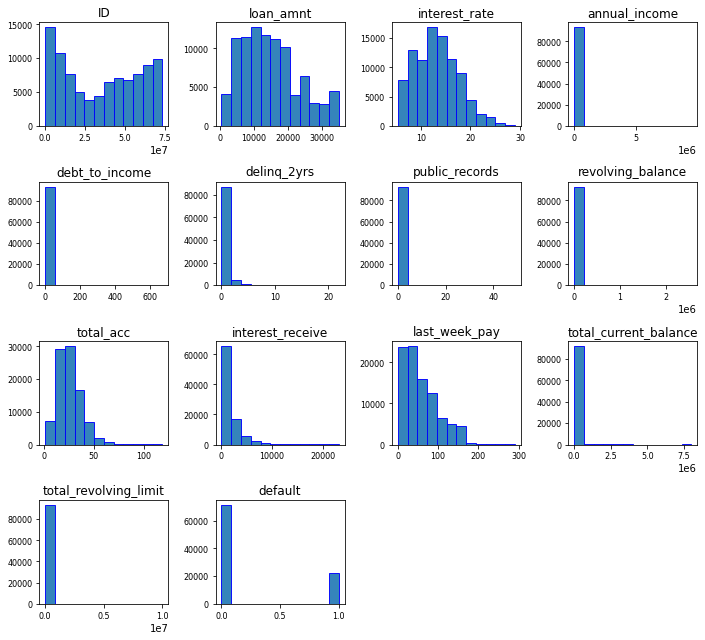

In [47]:
data.hist(figsize=(10,9), bins=12, ec="b", xlabelsize=8, ylabelsize=8, alpha=0.9, grid=False)
plt.tight_layout()
plt.show()

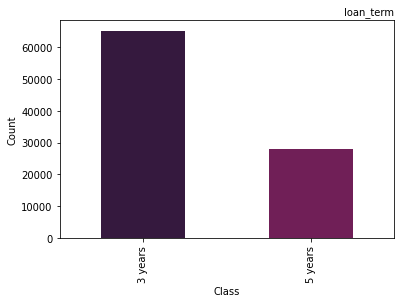

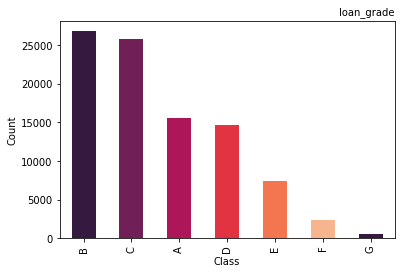

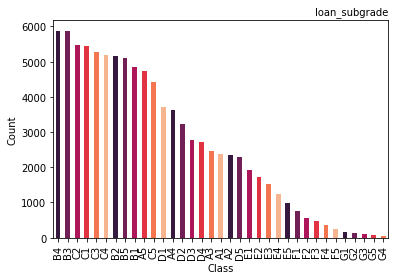

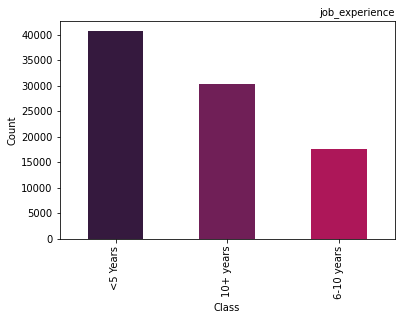

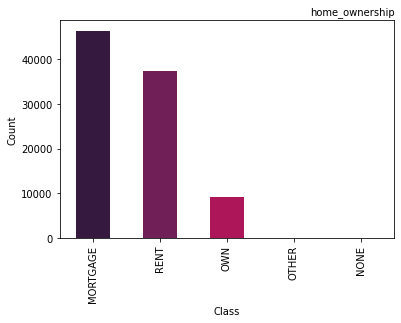

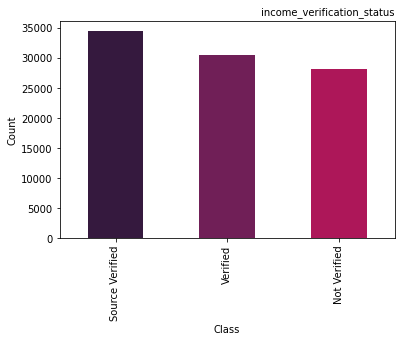

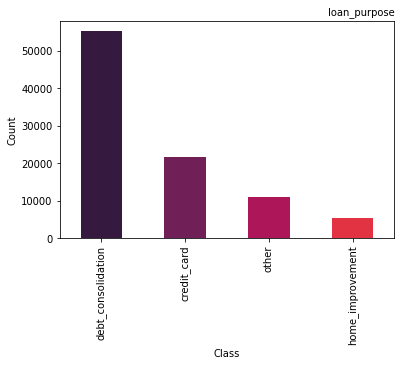

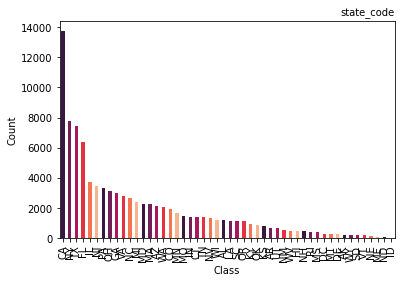

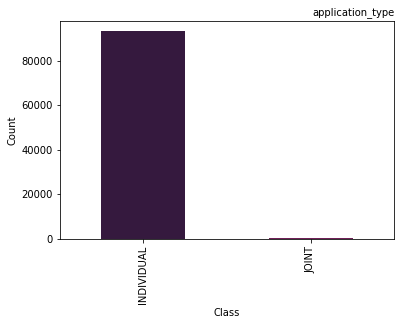

In [48]:
for col in data.select_dtypes(include=["object"]).columns:
    data[col].value_counts().plot(kind="bar", color=sns.color_palette("rocket"))
    
    plt.xlabel("Class", fontsize=10)
    plt.xticks(rotation=90, horizontalalignment="center")
    plt.ylabel("Count", fontsize=10)
    plt.title(col, fontsize=10, loc="right")
    plt.show()

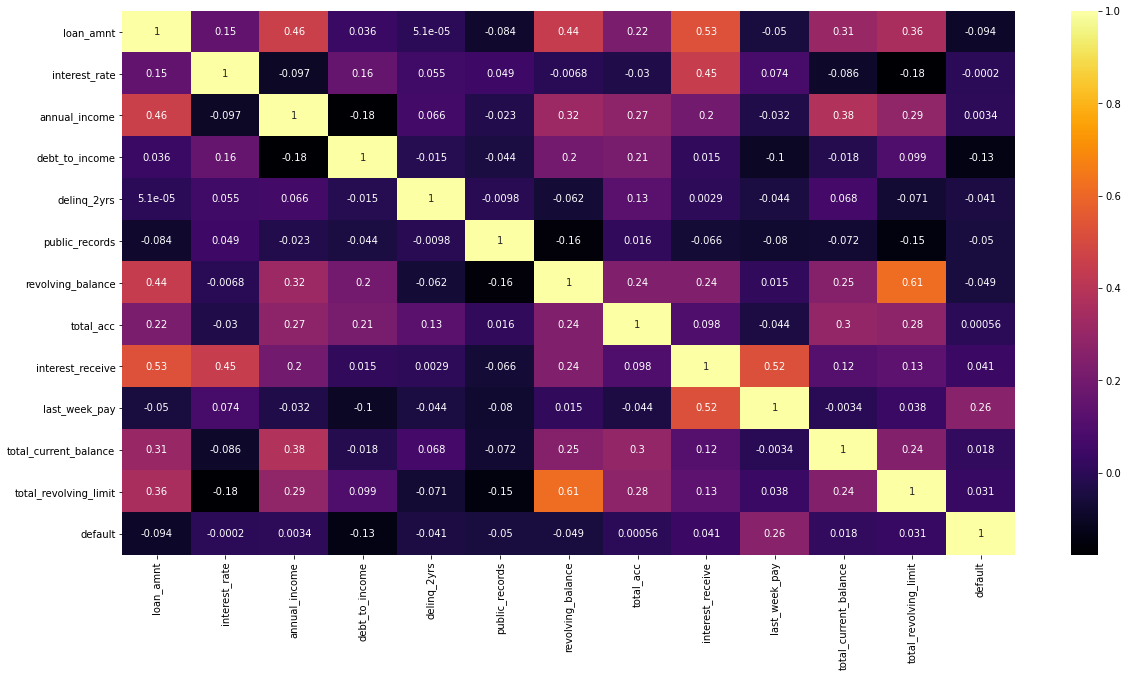

In [70]:
cm = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(cm, annot=True, cmap = 'inferno')

In [25]:
df_train.columns

Index(['ID', 'loan_amnt', 'loan_term', 'interest_rate', 'loan_grade',
       'loan_subgrade', 'job_experience', 'home_ownership', 'annual_income',
       'income_verification_status', 'loan_purpose', 'state_code',
       'debt_to_income', 'delinq_2yrs', 'public_records', 'revolving_balance',
       'total_acc', 'interest_receive', 'application_type', 'last_week_pay',
       'total_current_balance', 'total_revolving_limit', 'default'],
      dtype='object')

In [26]:
##Dealing with missing data
data = df_train.copy()
data.fillna(data.mean(),inplace = True)

In [28]:
data.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                4702
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      0
public_records                   0
revolving_balance                0
total_acc                        0
interest_receive                 0
application_type                 0
last_week_pay                    0
total_current_balance            0
total_revolving_limit            0
default                          0
dtype: int64

In [32]:
data.job_experience.value_counts()

<5 Years      40610
10+ years     30362
6-10 years    17500
Name: job_experience, dtype: int64

In [33]:
data.shape

(93174, 23)

In [34]:
data['default'].value_counts()

0    71045
1    22129
Name: default, dtype: int64

In [49]:
data.describe()

,ID,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,default
count,9.317400e+04,93174.000000,93174.000000,9.317400e+04,93174.000000,93174.000000,93174.000000,9.317400e+04,93174.000000,93174.000000,93174.000000,9.317400e+04,9.317400e+04,93174.000000
mean,3.505021e+07,14733.861378,13.233433,7.502826e+04,18.127623,0.316994,0.196121,1.685447e+04,25.248905,1747.263530,58.154882,1.392529e+05,3.208590e+04,0.237502
std,2.414926e+07,8428.184858,4.368728,6.945441e+04,8.563084,0.880850,0.581182,2.368907e+04,11.854934,2088.236141,43.866507,1.513077e+05,4.514904e+04,0.425555
min,7.073500e+04,500.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.085983e+07,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,6.433000e+03,17.000000,439.880000,22.000000,3.195300e+04,1.470000e+04,0.000000
50%,3.710751e+07,13000.000000,12.990000,6.400000e+04,17.640000,0.000000,0.000000,1.185600e+04,24.000000,1070.755000,48.000000,9.843500e+04,2.570000e+04,0.000000
75%,5.859895e+07,20000.000000,16.200000,9.000000e+04,23.890000,0.000000,0.000000,2.074500e+04,32.000000,2219.612500,83.000000,1.949948e+05,3.787500e+04,0.000000
max,7.351975e+07,35000.000000,28.990000,9.500000e+06,672.520000,22.000000,49.000000,2.560703e+06,119.000000,23172.310000,291.000000,8.000078e+06,9.999999e+06,1.000000


In [51]:
##Dealing with outliers

# through IQR score method
Q1 = data['annual_income'].quantile(0.25)
Q3 = data['annual_income'].quantile(0.75)
IQR = Q3 - Q1
data['annual_income'] = data.annual_income[~((data.annual_income < (Q1 - 1.5 * IQR)) |(data.annual_income > (Q3 + 1.5 * IQR)))]

In [53]:
##Dealing with outliers

# through IQR score method
Q1 = data['revolving_balance'].quantile(0.25)
Q3 = data['revolving_balance'].quantile(0.75)
IQR = Q3 - Q1
data['revolving_balance'] = data.revolving_balance[~((data.revolving_balance < (Q1 - 1.5 * IQR)) |(data.revolving_balance > (Q3 + 1.5 * IQR)))]

In [54]:
##Dealing with outliers

# through IQR score method
Q1 = data['total_revolving_limit'].quantile(0.25)
Q3 = data['total_revolving_limit'].quantile(0.75)
IQR = Q3 - Q1
data['total_revolving_limit'] = data.total_revolving_limit[~((data.total_revolving_limit < (Q1 - 1.5 * IQR)) |(data.total_revolving_limit > (Q3 + 1.5 * IQR)))]

In [55]:
data.describe()

,ID,loan_amnt,interest_rate,annual_income,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,last_week_pay,total_current_balance,total_revolving_limit,default
count,9.317400e+04,93174.000000,93174.000000,88973.000000,93174.000000,93174.000000,93174.000000,88130.000000,93174.000000,93174.000000,93174.000000,9.317400e+04,87180.000000,93174.000000
mean,3.505021e+07,14733.861378,13.233433,67372.254695,18.127623,0.316994,0.196121,13469.358788,25.248905,1747.263530,58.154882,1.392529e+05,26305.736622,0.237502
std,2.414926e+07,8428.184858,4.368728,29800.720757,8.563084,0.880850,0.581182,9456.509405,11.854934,2088.236141,43.866507,1.513077e+05,15401.104426,0.425555
min,7.073500e+04,500.000000,5.320000,1200.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,1.085983e+07,8000.000000,9.990000,45000.000000,11.930000,0.000000,0.000000,6174.000000,17.000000,439.880000,22.000000,3.195300e+04,14100.000000,0.000000
50%,3.710751e+07,13000.000000,12.990000,62000.000000,17.640000,0.000000,0.000000,11189.000000,24.000000,1070.755000,48.000000,9.843500e+04,24000.000000,0.000000
75%,5.859895e+07,20000.000000,16.200000,85000.000000,23.890000,0.000000,0.000000,18775.000000,32.000000,2219.612500,83.000000,1.949948e+05,33700.000000,0.000000
max,7.351975e+07,35000.000000,28.990000,157500.000000,672.520000,22.000000,49.000000,42211.000000,119.000000,23172.310000,291.000000,8.000078e+06,72600.000000,1.000000


In [59]:
##filling null in job_experience

data["job_experience"] = data.job_experience.fillna(data.job_experience.value_counts().index[0])
print(f"Imputation done. Missing values: {data.job_experience.isnull().sum()}")

Imputation done. Missing values: 0


In [63]:
data.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                   0
home_ownership                   0
annual_income                 4201
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      0
public_records                   0
revolving_balance             5044
total_acc                        0
interest_receive                 0
application_type                 0
last_week_pay                    0
total_current_balance            0
total_revolving_limit         5994
default                          0
dtype: int64

In [64]:

data.fillna(data.mean(),inplace = True)

In [65]:
data.isnull().sum()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
default                       0
dtype: int64

In [67]:
data.drop("ID", axis=1, inplace=True)

In [68]:
data.head(1)

,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit,default
0,9000,3 years,9.17,B,B2,<5 Years,OWN,85000.0,Not Verified,debt_consolidation,NC,26.68,0.0,0.0,39519.0,20.0,59.6,INDIVIDUAL,4.0,95493.0,26305.736622,0


In [72]:
data.dtypes

loan_amnt                       int64
loan_term                      object
interest_rate                 float64
loan_grade                     object
loan_subgrade                  object
job_experience                 object
home_ownership                 object
annual_income                 float64
income_verification_status     object
loan_purpose                   object
state_code                     object
debt_to_income                float64
delinq_2yrs                   float64
public_records                float64
revolving_balance             float64
total_acc                     float64
interest_receive              float64
application_type               object
last_week_pay                 float64
total_current_balance         float64
total_revolving_limit         float64
default                         int64
dtype: object

In [74]:
data.state_code.unique()

array(['NC', 'SC', 'TX', 'MO', 'IL', 'NY', 'CT', 'CA', 'VA', 'GA', 'OR',
       'NV', 'LA', 'RI', 'IN', 'AZ', 'OK', 'MN', 'WY', 'HI', 'MI', 'CO',
       'MS', 'NJ', 'WA', 'UT', 'NM', 'KY', 'MA', 'FL', 'PA', 'WI', 'OH',
       'DE', 'DC', 'WV', 'MD', 'TN', 'NE', 'AL', 'KS', 'SD', 'VT', 'MT',
       'AK', 'AR', 'NH', 'ME', 'ND', 'ID'], dtype=object)

In [75]:
##ENCODING USING ONE HOT ENCODING

data = pd.get_dummies(data, columns=["loan_term","loan_grade","loan_subgrade","job_experience","home_ownership","income_verification_status","loan_purpose","state_code","application_type"])

In [78]:
data.shape

(93174, 124)

# MODEL BUILDING

In [79]:
##Ssplitting to train and test

X = data.drop(columns="default")
Y = data["default"]

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

print(X_train.shape, X_test.shape)

(65221, 123) (27953, 123)


In [84]:
# Normalizing the train and test data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_names = X_train.columns
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns = features_names)


In [86]:
X_test= scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns = features_names)

MODEL 1: Random Forest Classifier

In [89]:
rf = RandomForestClassifier(random_state = 42, class_weight = None).fit(X_train, y_train)
parameters = {'n_estimators':[10, 100, 300, 1000]}
clf_rf = GridSearchCV(rf, parameters, cv = 5).fit(X_train, y_train)

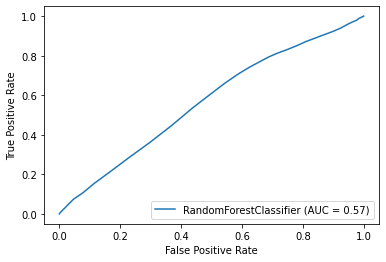

In [90]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf,X_test,y_test)

In [107]:
##Encoding Test data
test_data = df_test.copy()
test_data.head(2)

,ID,loan_amnt,loan_term,interest_rate,loan_grade,loan_subgrade,job_experience,home_ownership,annual_income,income_verification_status,loan_purpose,state_code,debt_to_income,delinq_2yrs,public_records,revolving_balance,total_acc,interest_receive,application_type,last_week_pay,total_current_balance,total_revolving_limit
0,4855329,12000,3 years,15.31,C,C2,<5 Years,MORTGAGE,73400.0,Not Verified,debt_consolidation,CA,14.62,0.0,0.0,22156,30.0,2290.24,INDIVIDUAL,87.0,128098.0,25800.0
1,66862420,12000,3 years,7.26,A,A4,10+ years,MORTGAGE,105000.0,Not Verified,credit_card,VA,11.38,0.0,0.0,7592,14.0,202.68,INDIVIDUAL,13.0,269396.0,23600.0


In [108]:
test_data.dtypes

ID                              int64
loan_amnt                       int64
loan_term                      object
interest_rate                 float64
loan_grade                     object
loan_subgrade                  object
job_experience                 object
home_ownership                 object
annual_income                 float64
income_verification_status     object
loan_purpose                   object
state_code                     object
debt_to_income                float64
delinq_2yrs                   float64
public_records                float64
revolving_balance               int64
total_acc                     float64
interest_receive              float64
application_type               object
last_week_pay                 float64
total_current_balance         float64
total_revolving_limit         float64
dtype: object

In [110]:
test_data.isnull().sum()

ID                               0
loan_amnt                        0
loan_term                        0
interest_rate                    0
loan_grade                       0
loan_subgrade                    0
job_experience                2089
home_ownership                   0
annual_income                    0
income_verification_status       0
loan_purpose                     0
state_code                       0
debt_to_income                   0
delinq_2yrs                      1
public_records                   1
revolving_balance                0
total_acc                        1
interest_receive                 0
application_type                 0
last_week_pay                  806
total_current_balance         3230
total_revolving_limit         3230
dtype: int64

In [111]:
test_data["job_experience"] = test_data.job_experience.fillna(test_data.job_experience.value_counts().index[0])
print(f"Imputation done. Missing values: {test_data.job_experience.isnull().sum()}")
test_data.fillna(test_data.mean(),inplace = True)

Imputation done. Missing values: 0


In [112]:
test_data.isnull().sum()

ID                            0
loan_amnt                     0
loan_term                     0
interest_rate                 0
loan_grade                    0
loan_subgrade                 0
job_experience                0
home_ownership                0
annual_income                 0
income_verification_status    0
loan_purpose                  0
state_code                    0
debt_to_income                0
delinq_2yrs                   0
public_records                0
revolving_balance             0
total_acc                     0
interest_receive              0
application_type              0
last_week_pay                 0
total_current_balance         0
total_revolving_limit         0
dtype: int64

Missing values in test data handled

In [113]:
test_data = pd.get_dummies(test_data, columns=["loan_term","loan_grade","loan_subgrade","job_experience","home_ownership","income_verification_status","loan_purpose","state_code","application_type"])

In [114]:
test_data.dtypes

ID                               int64
loan_amnt                        int64
interest_rate                  float64
annual_income                  float64
debt_to_income                 float64
                                ...   
state_code_WI                    uint8
state_code_WV                    uint8
state_code_WY                    uint8
application_type_INDIVIDUAL      uint8
application_type_JOINT           uint8
Length: 124, dtype: object

In [116]:
test_data.drop("ID", axis=1, inplace=True)

In [121]:
submission1 = df_test[["ID"]]
submission1["default"] = rf.predict(test_data)
submission1.to_csv("/home/rf.csv",index=False)

In [122]:
submission1.head()

,ID,default
0,4855329,1
1,66862420,1
2,3637416,1
3,53682249,1
4,53937165,1


MODEL 2: CatBoost Classifier

In [124]:
CBC = CatBoostClassifier()
CBC.fit(X_train, y_train, eval_set = (X_test,y_test),cat_features = np.where(data.dtypes == "object")[0])

Learning rate set to 0.088933
0:	learn: 0.6478049	test: 0.7202733	best: 0.7202733 (0)	total: 92.1ms	remaining: 1m 32s
1:	learn: 0.6137411	test: 0.7975475	best: 0.7202733 (0)	total: 123ms	remaining: 1m 1s
2:	learn: 0.5843665	test: 0.8007299	best: 0.7202733 (0)	total: 158ms	remaining: 52.5s
3:	learn: 0.5618137	test: 0.8013677	best: 0.7202733 (0)	total: 192ms	remaining: 47.8s
4:	learn: 0.5441085	test: 0.8943013	best: 0.7202733 (0)	total: 223ms	remaining: 44.3s
5:	learn: 0.5290035	test: 0.8551418	best: 0.7202733 (0)	total: 251ms	remaining: 41.6s
6:	learn: 0.5148570	test: 0.9154408	best: 0.7202733 (0)	total: 302ms	remaining: 42.9s
7:	learn: 0.5034973	test: 0.9116684	best: 0.7202733 (0)	total: 335ms	remaining: 41.5s
8:	learn: 0.4938966	test: 0.8902905	best: 0.7202733 (0)	total: 368ms	remaining: 40.6s
9:	learn: 0.4861765	test: 0.8747584	best: 0.7202733 (0)	total: 399ms	remaining: 39.5s
10:	learn: 0.4796208	test: 0.9340405	best: 0.7202733 (0)	total: 430ms	remaining: 38.7s
11:	learn: 0.4733851	

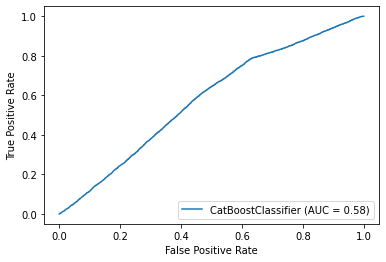

In [125]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(CBC,X_test,y_test)

In [126]:
submission2 = df_test[["ID"]]
submission2["default"] = CBC.predict(test_data)
submission2.to_csv("/home/cbc.csv",index=False)

In [127]:
submission2.head()

,ID,default
0,4855329,1
1,66862420,0
2,3637416,0
3,53682249,1
4,53937165,0


MODEL 3: SVC

> Indented block



In [130]:
df_svm = data.copy()
train_set_svc, test_set_svc = train_test_split(df_svm, test_size = 0.2, random_state = 42)
X_train_svc = train_set_svc.drop(['default'], axis = 1)
y_train_svc = train_set_svc['default']
X_test_svc = test_set_svc.drop(['default'], axis = 1)
y_test_svc = test_set_svc['default']


In [131]:
zscore_svc = StandardScaler()
features_names = X_train_svc.columns
X_train_svc = zscore_svc.fit_transform(X_train_svc)
X_train_svc = pd.DataFrame(X_train_svc, columns = features_names)
X_test_svc = zscore_svc.transform(X_test_svc)
X_test_svc = pd.DataFrame(X_test_svc, columns = features_names)

In [ ]:
svc = SVC(random_state=42, class_weight='balanced',probability=True, verbose=True)
parameters = {'C':[0.1, 1, 10]}
clf_svc = GridSearchCV(svc, parameters, cv = 5).fit(X_train_svc, y_train_svc)


[LibSVM][LibSVM][LibSVM]

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf_svc,X_test,y_test)

In [ ]:
submission3 = df_test[["ID"]]
submission3["default"] = clf_scv.predict(test_data)
submission3.to_csv("/home/svc.csv",index=False)

In [ ]:
svc = SVC(random_state=42, class_weight='balanced',probability=True, verbose=True)
parameters = {'C':[0.1, 1, 10]}
rlf_svc = RandomSearch(svc, parameters, cv = 5).fit(X_train_svc, y_train_svc)

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rlf_svc,X_test,y_test)

In [ ]:
submission6 = df_test[["ID"]]
submission6["default"] = rlf_scv.predict(test_data)
submission6.to_csv("/home/svc.csv",index=False)